## 2.3
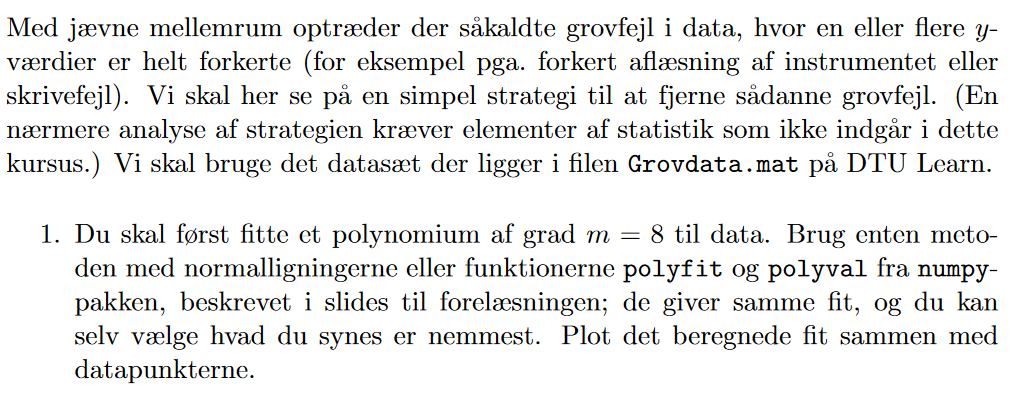

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [16]:
FitData = io.loadmat('Grovdata.mat')
x = np.array(FitData['x'].flatten())
y = np.array(FitData['y'].flatten())

In [17]:
# polynomial of degree 8
def Fc(x,c):
    return c[0]+c[1]*x+c[2]*x**2+c[3]*x**3+c[4]*x**4+c[5]*x**5+c[6]*x**6+c[7]*x**7+c[8]*x**8

# Polynomial of degree 8
def F(x):
    return [1,x,x**2,x**3,x**4,x**5,x**6,x**7,x**8]

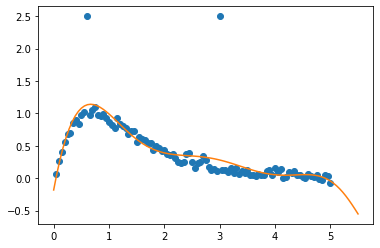

In [18]:
A = np.array(list(map(F,x)))
c = np.linalg.solve(A.T@A, A.T@y)

plt.plot(x,y,'o')
plt.plot(np.linspace(0,5.5,100),list(map(lambda x: Fc(x,c),np.linspace(0,5.5,100))))
plt.show()

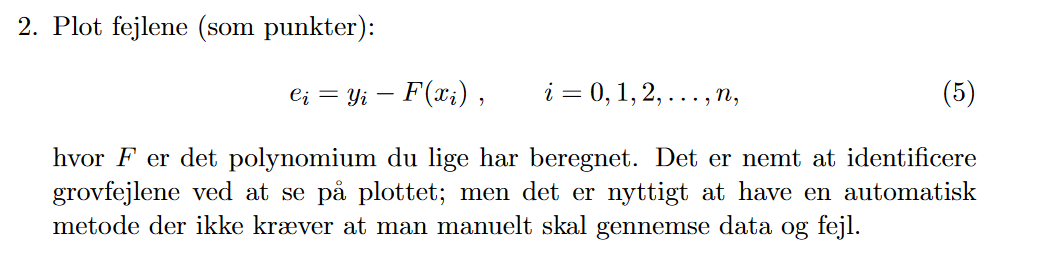

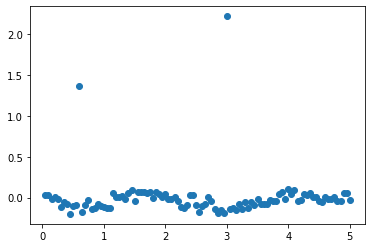

In [20]:
e = y - Fc(x,c)
# Plot
plt.plot(x,e,'o')

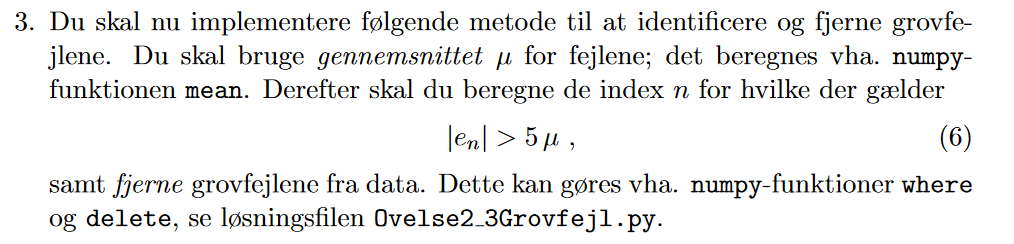

In [31]:
# New array without outliers
e_new = e[e>0.5*np.mean(np.abs(e))]
x_new = x[e>0.5*np.mean(np.abs(e))]
y_new = y[e>0.5*np.mean(np.abs(e))]

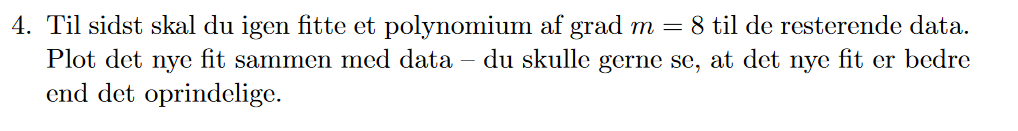

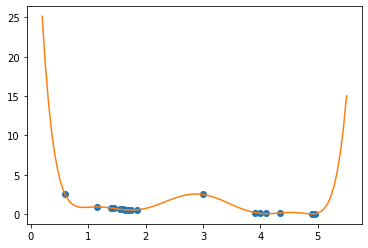

In [34]:
# Fit again with new data
A = np.array(list(map(F,x_new)))
c = np.linalg.solve(A.T@A, A.T@y_new)

plt.plot(x_new,y_new,'o')
plt.plot(np.linspace(0.2,5.5,100),list(map(lambda x: Fc(x,c),np.linspace(0.2,5.5,100))))
plt.show()

## 3.2
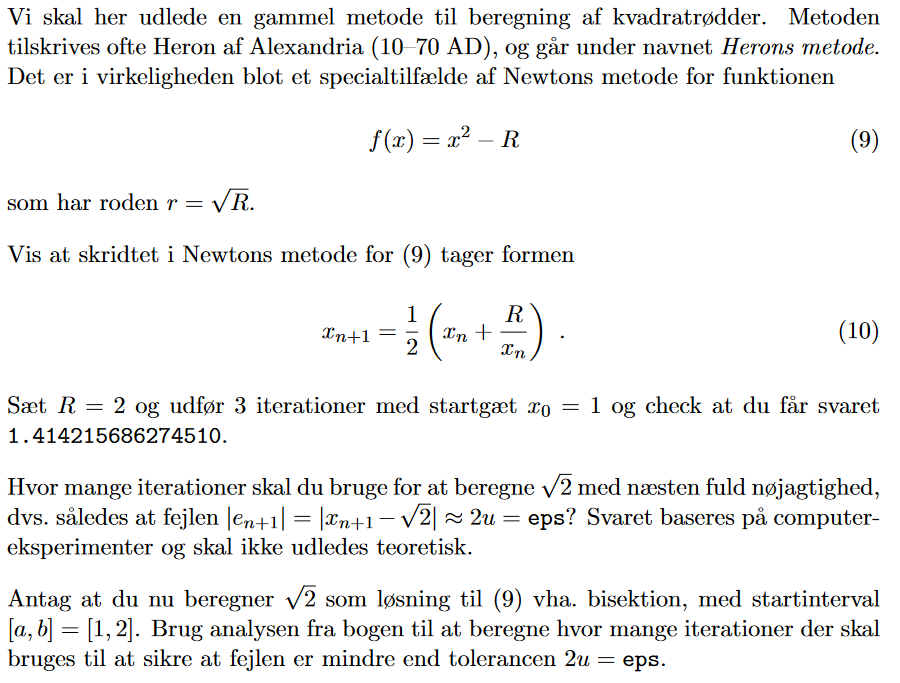

In [47]:
f = lambda x: x**2-R
df = lambda x: 2*x

In [48]:
def Neewton(f,df,x0, nmax, tol=1e-6,true_root=None):
    x = x0
    X = [x]
    for i in range(nmax):
        if true_root is not None:
            if np.abs(x-true_root) < tol:
                break
        fx = f(x)
        fp = df(x)
        x = x - fx/fp
        X.append(x)
    return X

In [49]:
R = 2

In [56]:
Neewton(f,df,1,20000,np.finfo(float).eps,np.sqrt(2))

[1,
 1.5,
 1.4166666666666667,
 1.4142156862745099,
 1.4142135623746899,
 1.4142135623730951]

In [58]:
# with bisektion
n = np.ceil((np.log(2-1)-np.log(2*np.finfo(float).eps))/np.log(2))
n

52.0

## 3.4
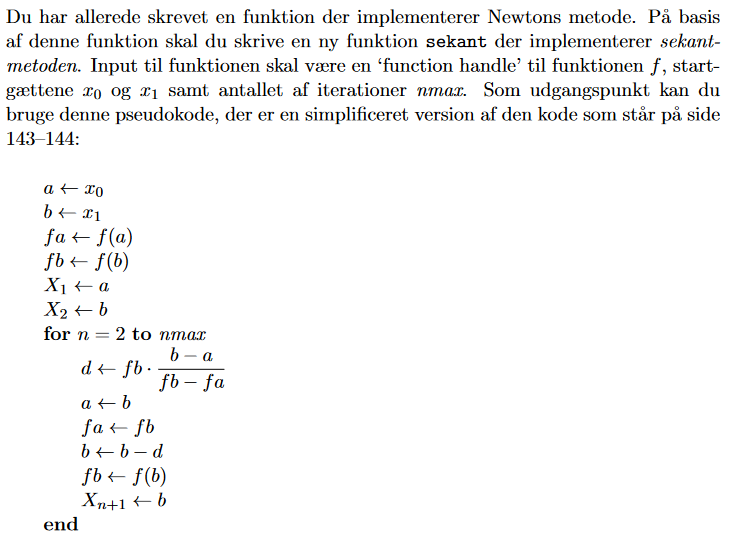
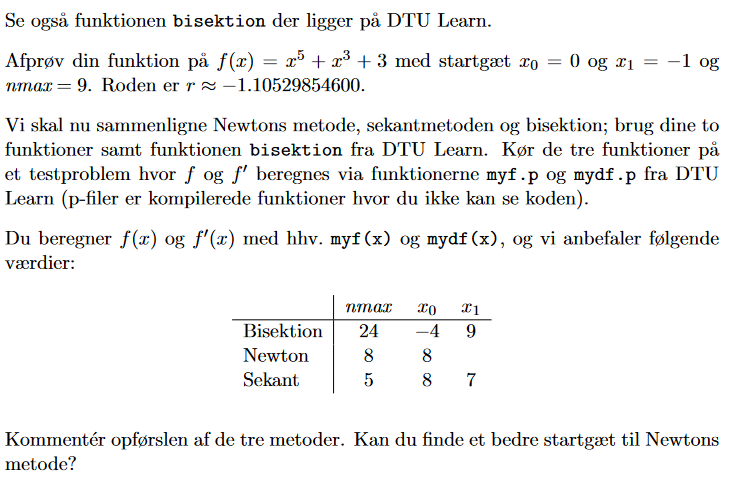

In [66]:
f = lambda x: x**5 + x**3 + 3
fp = lambda x: 5*x**4 + 3*x**2
x0 = 0
x1 = -1
nmax = 9

In [62]:
def sekant(f,x0,x1,nmax):
    a = x0
    b = x1
    fa = f(a)
    fb = f(b)
    X = [a,b]
    for i in range(nmax):
        d = fb*(b-a)/(fb-fa)
        a = b
        fa = fb
        b = b - d
        fb = f(b)
        X.append(b)
    return X

In [63]:
def Bisection(f, a, b, nmax):
    # Check input.
    if nmax < 1:
        raise ValueError("nmax must be a positive number")
    # Prepare to iterate.
    if a >= b:
        raise ValueError("a must be less than b")
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        raise ValueError("f(a) and f(b) must have different signs")
    X = [0] * (nmax + 1)  # Create X to store the iterations.
    # Iterate.
    for n in range(nmax):
        c = (a + b) / 2  # The midpoint.
        fc = f(c)  # The corresponding function value.
        X[n] = c
        if fa * fc < 0:
            b = c
            # fb = fc  # Note that fb = f(b) is actually not used.
        else:
            a = c
            fa = fc
    # Finish by computing the midpoint of the last interval.
    c = (a + b) / 2
    X[nmax] = c
    return X

In [64]:
sekant(f,x0,x1,nmax)

[0,
 -1,
 -1.5,
 -1.0557491289198606,
 -1.0825521565950564,
 -1.1070953658726013,
 -1.105235826838816,
 -1.1052983758843113,
 -1.1052985460222975,
 -1.1052985460061695,
 -1.1052985460061695]

In [3]:
# read function from .p file
import pickle

In [4]:
# read myf function from file
myf = pickle.load(open('myf.p', 'rb'))

UnpicklingError: invalid load key, 'v'.

In [1]:
import pandas as pd

In [6]:
pd.read_pickle('myf.p')

UnpicklingError: invalid load key, 'v'.